# Actividad Test de Bondad de Ajuste

En esta actividad vamos a realizar un test de bondad de ajuste para identificar si el ancho de las hojas de la clase 1 y 2 son **independientes**.

Para eso vamos a realizar un *paso a paso* para lograr plantear un **test de bondad de ajuste** para decidir si hay evidencia para rechazar esta afirmacion.

In [1]:
#Librerias que pueden ser utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import os


In [4]:
file_path = 'dataset.csv'
data = pd.read_csv(file_path)


## Actividad 1

a) Hacer los histogramas $h_X$ y $h_Y$ para
- $X$ = "ancho de la C1"
- $Y$ = "ancho de la C2"

b) Guardar los valores $N$ y $M$, donde $N$ es la cantidad de bins del histograma de $X$ y $M$ la cantidad de bins del histograma de $Y$.


**Nota:**
- Como sabrán, en los datos pueden contener Nans (valores "Not a Number"s), por lo que es importante que no figuren esos valores. No deberían trabajar con Nans, es algo que se encontrarán en trabajos reales.
- La clase 1 tiene $L1$ muestras y las clase 2 tiene $L2$ muestras. Pueden quedarse con $L$ muestras de cada clase, donde $L = min(L1, L2)$ para trabajar con la misma cantidad de muestras.

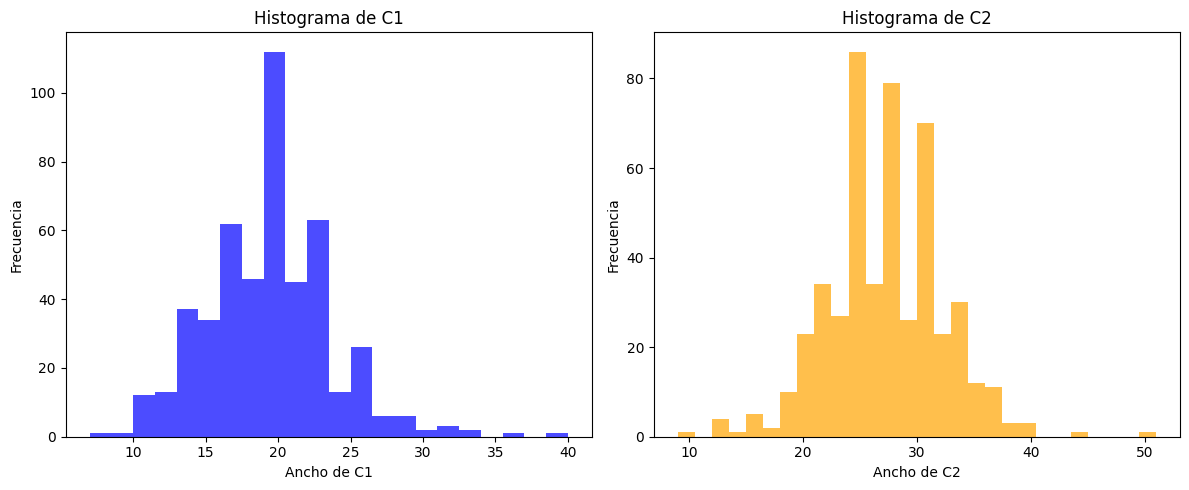

(23, 29)

In [5]:
# Filtrar las clases
C1_data = data[data['clase'] == 1.0]['ancho']
C2_data = data[data['clase'] == 2.0]['ancho']

# Eliminar NaNs
C1_clean = C1_data.dropna().to_numpy()
C2_clean = C2_data.dropna().to_numpy()

# Determinar el tamaño mínimo entre las dos clases
L = min(len(C1_clean), len(C2_clean))

# Seleccionar L muestras de cada clase para trabajar con la misma cantidad de datos
C1_samples = C1_clean[:L]
C2_samples = C2_clean[:L]

# Crear histogramas
plt.figure(figsize=(12, 5))

# Histograma de C1
plt.subplot(1, 2, 1)
N, bins_X, _ = plt.hist(C1_samples, bins='auto', alpha=0.7, color='blue')
plt.title('Histograma de C1')
plt.xlabel('Ancho de C1')
plt.ylabel('Frecuencia')

# Histograma de C2
plt.subplot(1, 2, 2)
M, bins_Y, _ = plt.hist(C2_samples, bins='auto', alpha=0.7, color='orange')
plt.title('Histograma de C2')
plt.xlabel('Ancho de C2')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Guardar la cantidad de bins
N_bins = len(bins_X) 
M_bins = len(bins_Y) 

N_bins, M_bins


# Actividad 2

Hacer el histograma conjunto $H_{XY}$ de $X$ e $Y$.

**Nota:**
- Se espera una matriz de $N$x$M$.
- Explorar la funcion **np.histogram2d**



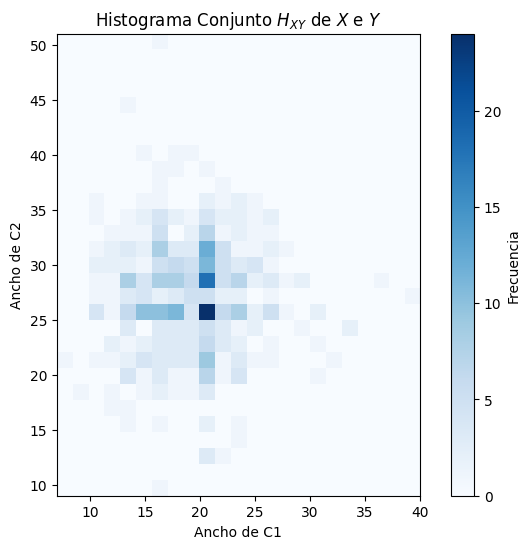

(23, 29)

In [6]:

# Calcular el histograma conjunto utilizando np.histogram2d
H, xedges, yedges = np.histogram2d(C1_samples, C2_samples, bins=[N_bins, M_bins])

# Visualizar el histograma conjunto
plt.figure(figsize=(8, 6))
plt.imshow(H.T, origin='lower', cmap='Blues', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Frecuencia')
plt.xlabel('Ancho de C1')
plt.ylabel('Ancho de C2')
plt.title('Histograma Conjunto $H_{XY}$ de $X$ e $Y$')
plt.show()

# El histograma conjunto H es una matriz de N x M
H.shape

# Actividad 3

Si asumimos que $X$ e $Y$ son independientes, enonces debe suceder que el histograma conjunto de $X$ e $Y$ sea

$$H_{X \perp Y} = h_X \cdot h_Y$$

Calcular empiricamente $H_{X \perp Y}$ si asumimos $X$ e $Y$ independientes.



[[    1     0     4     1     5     2    10    23    34    27    26    94
     30    75    47    44    22    22     9     2     3     3     0     0
      1     0     0     0     1]
 [    1     0     4     1     5     2    10    23    34    27    26    94
     30    75    47    44    22    22     9     2     3     3     0     0
      1     0     0     0     1]
 [   12     0    48    12    60    24   120   276   408   324   312  1128
    360   900   564   528   264   264   108    24    36    36     0     0
     12     0     0     0    12]
 [   13     0    52    13    65    26   130   299   442   351   338  1222
    390   975   611   572   286   286   117    26    39    39     0     0
     13     0     0     0    13]
 [   37     0   148    37   185    74   370   851  1258   999   962  3478
   1110  2775  1739  1628   814   814   333    74   111   111     0     0
     37     0     0     0    37]
 [   34     0   136    34   170    68   340   782  1156   918   884  3196
   1020  2550  1598  

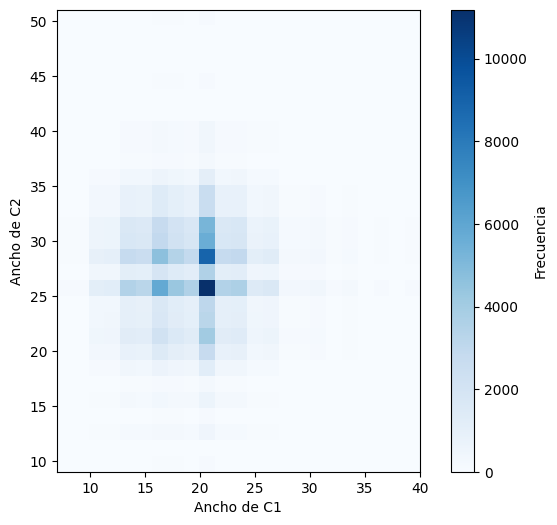

(23, 29)

In [8]:
# Calcular los histogramas marginales para X e Y
h_X, _ = np.histogram(C1_samples, bins=N_bins)
h_Y, _ = np.histogram(C2_samples, bins=M_bins)

# Calcular el histograma conjunto bajo la suposición de independencia
H_XY_independiente = np.outer(h_X, h_Y)
# Visualizar el histograma conjunto bajo la suposición de independencia
plt.figure(figsize=(8, 6))
plt.imshow(H_XY_independiente.T, origin='lower', cmap='Blues', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Frecuencia')
plt.xlabel('Ancho de C1')
plt.ylabel('Ancho de C2')
plt.show()

# Imprimir la forma de la matriz de histograma conjunto
H_XY_independiente.shape



## Actividad 4

Plantear EN SUS HOJAS un test de **bondad de ajuste** con *significancia* $ɛ = 0.05$ para la hipotesis
$$H = X \perp Y$$


- ¿Cuantos grados de libertad tiene nuestro test?
- ¿Hay evidencia para decir que el ancho de la C1 **NO** es independiente del ancho de la C2?





In [10]:
# Actividad 4
from scipy.stats import chi2

counter = 0
for i in range(N_bins):
    for j in range(M_bins):
        if h_X[i] * h_Y[j] != 0:
            counter += ((H[i, j] - (h_X[i] * h_Y[j]) / L) ** 2) / ((h_X[i] * h_Y[j]) / L)

if counter > chi2.ppf(0.05,(N_bins-1)*(M_bins-1)):
    print("Rechazamos H0: Hay evidencia para decir que X e Y no son independientes.")
else:
    print("No rechazamos H0: No hay evidencia suficiente para decir que X e Y no son independientes.")

print(f"Grados de libertad: {(N_bins-1)*(M_bins-1)}")
print(chi2.ppf(0.05,(N_bins-1)*(M_bins-1)))

No rechazamos H0: No hay evidencia suficiente para decir que X e Y no son independientes.
Grados de libertad: 616
559.4250568091179
